In [40]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import pandas as pd 
from os import path
from numpy.linalg import norm
from cmaps import *
from cycler import cycler

In [41]:
r_label = 'r_\mathrm{trunc}'

In [42]:
stephen_dir = '../../data/stephen_data/'
labels = np.genfromtxt(path.join(stephen_dir, 'tb_j_labels.txt'), delimiter='\t', dtype=str)
js = np.transpose(np.genfromtxt(path.join(stephen_dir, 'tb_j.txt'), delimiter='\t'))
lambda_means = np.transpose(np.genfromtxt(path.join(stephen_dir, 'tb_lambda_means.txt'), delimiter='\t'))
lambda_stds = np.transpose(np.genfromtxt(path.join(stephen_dir, 'tb_lambda_stds.txt'), delimiter='\t'))

# Drop values for no truncation
js = js[0:-2]
lambda_means = lambda_means[0:-2]
lambda_stds = lambda_stds[0:-2]

In [43]:
# rescale j 
j_scale = lambda_means[-1] / np.power(js[-1], 2)

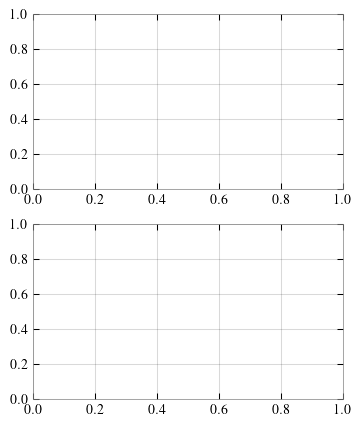

In [44]:
fig, ax = plt.subplots(nrows=2, 
                       figsize=(4, 5))
                    #    gridspec_kw={'height_ratios': [1, 1]})
c = cycler(color=['lightcoral', 'cornflowerblue', 'mediumseagreen', 'gold'])

# https://cran.r-project.org/web/packages/khroma/vignettes/tol.html 
# colorblind-friendly scheme by Paul Tol. Pick only 4 because need those colors 
# to cycle back for std deviation and dashed lines
c = cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'][0:4])

for a in ax: a.set_prop_cycle(c)

In [45]:
ax[0].plot(j_scale * np.power(js, 2), alpha=0.80, linestyle='dashed')
ax[0].plot(lambda_means, alpha=0.80)
ax[0].set_yscale('log')

In [46]:
for i in range(0, np.shape(js)[1]):
	print(np.arange(0, len(js[:,i]) + 1))
	# std dev bands
	ax[0].fill_between(np.arange(0, len(js[:, i])), 
		    		   np.abs(lambda_means[:, i] - lambda_stds[:, i]), 
					   np.abs(lambda_means[:, i] + lambda_stds[:, i]), 
					   alpha=0.5)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


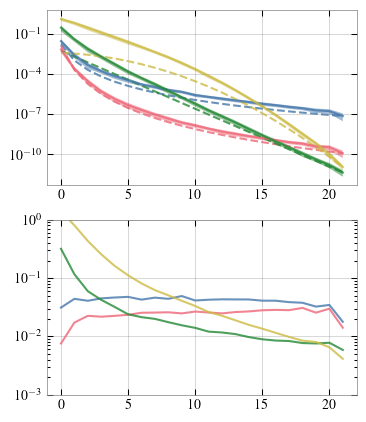

In [47]:
ax[1].plot(lambda_means / np.power(js, 2), alpha=0.80, label=labels)
ax[1].set_yscale('log')
ax[1].set_ylim(0.001, 1)
fig

In [48]:
# Std dev bands
for i in range(0, np.shape(js)[1]):
	print(np.arange(0, len(js[:,i]) + 1))
	ax[1].fill_between(np.arange(0, len(js[:, i])), 
		    		   np.abs(lambda_means[:, i] - lambda_stds[:, i]) / np.power(js[:, i], 2), 
					   np.abs(lambda_means[:, i] + lambda_stds[:, i]) / np.power(js[:, i], 2), 
					   alpha=0.2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [49]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

ax[1].set_xlabel(f'${r_label}$')
ax[0].set_ylabel('$\lambda_0$')
ax[1].set_ylabel(f'$Q({r_label})$')
ax[1].legend(frameon=False, bbox_to_anchor=(0.5,-0.47), 
            loc='lower center', ncol=len(labels),
            # borderpad=0, 
            columnspacing=1)
for a in ax: a.xaxis.set_minor_locator(MultipleLocator(1))

In [50]:
ax[0].text(0.04, 0.15, '(a)', transform=ax[0].transAxes,
		fontsize=14, va='top')
ax[1].text(0.04, 0.15, '(b)', transform=ax[1].transAxes,
		fontsize=14, va='top')

Text(0.04, 0.15, '(b)')

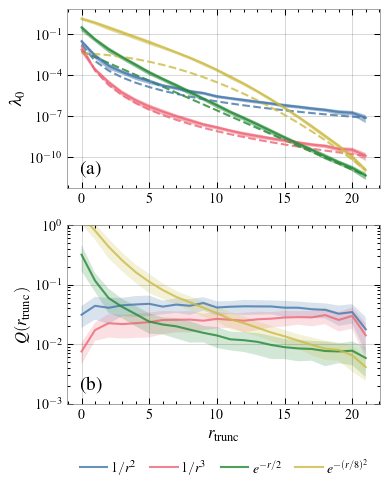

In [51]:
fig.tight_layout()
fig.set_figwidth(4)
fig

In [52]:
fig.savefig('../drafts/tb_truncations_v0.pdf')
fig.savefig('../drafts/tb_truncations_v0.png')
fig.get_size_inches()*fig.dpi

array([400., 500.])